<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/Apriori_Association_Rules_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Association Rules Mining**

Data mining turns into a very significant matter in all the industries to modify the larger consumer list. Association rule defines the connection among irrelevant data in an interactive database to find the fascinating and common form of the origin of lower standards:-

• Support:- How often the piece exists in the client record?

• Confidence:- Number of pieces consumers buy as per our estimate.

For example:- If we need an instance of a store in which a client purchases a dozen eggs then there will be other than an 80% of chance that he is as well buy the milk. So, at the beginning of the association rule, we can predict customer behavior.

Association rule has been divided into two parts:-

• Antecedent:- It is the "if" declaration of the organization’s rule. The element found in the folder through analysis of common patterns.

• Consequent:- It is the "then" declaration of the organization rule. The element found in the file in relation/pattern to the ancestor.

Association rules mining is a method employed to rapidly locate relationships among pieces in a database. Several businesses that could prefer organization rules mining over association rule learning are healthcare, retail, and logistics.

Association rules mining is a technique used to find associations between items in a database. Association rule learning is more than usually employed in the educational study, while association rules mining is more normally used in commercial applications.

Association rules mining is more commonly used in business applications. This is because association rule learning is more effective at finding hidden patterns and trends in data, while association rules mining is more effective at quickly finding associations between items in a database.


#**Prediction**

Predict the intention (make a purchase or not) of e-commerce website visitors.

#**Data Source**

http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

## **Data Information**

The dataset contains present vectors be appropriate to 12,330 Instances. The dataset was established so that every session would fit in to a distinct customer in a 1-year interval to prevent any inclination to a particular promotion, unique day, client profile, or cycle. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class sections that did not end with shopping, and the remainder (1908) were positive class samples concluding with shopping.

**Numerical features**



Feature name|Feature description            |Min |Max |   SD 
------------|-------------------------------|----|----|------
Admin.      |#pages visited by the visitor  |    |    |      
 |about account management       | 0  | 27 |3.32        
------------|-------------------------------|----|----|------
Ad. duration|#seconds spent by the visitor  
 |on management related pages    |  0 |3398|176.70
 ------------|-------------------------------|----|----|-----
 Info.       |#informational pages visited   |    |    |
|by the visitor                 | 0  | 24 | 1.26 |
------------|-------------------------------|----|----|------
Info. durat.|#seconds spent by the visitor  |    |    |
|on informational pages         | 0  |2549| 140.64
------------|-------------------|--|------|-------|----------
Prod. |#pages visited by visitor | | ||
 |about product related pages | 0| 705| 44.45|
------------|-------------------|--|------|-------|
Prod.durat. |#seconds spent by the visitor | | | |
 |on product related pages |0 |63,973| 1912.3
------------|-------------------|--|------|-------|
Bounce rate |Average bounce rate value of | | | |
|the pages visited by the visitor |0 | 0.2 | 0.04 
------------|-------------------|--|------|-------|
Exit rate |Average exit rate value of the| | | |
 |pages visited by the visitor |0 | 0.2| 0.05
 -----------|-------------------|--|------|-------|
 Page value |Average page value of the | | | |
 |pages visited by the visitor |0 | 361| 18.55
 -----------|------------------|--|------|-------
 Special day |Closeness of the site visiting| | | |
 |time to a special day |0 | 1.0| 0.19 
 ------------|------------------------------|--|------|-------|

**Categorical features**

Feature name|Feature description            |Number of Value 
----------------|--------------------------------------|-----
OperatingSystems|Operating Systems of the visitor      | 8     
----------------|--------------------------------------|---
Browser	|Browser of the visitor	|13
----------------|--------------------------------------|-----
Region	|Geographic region from which the session has 
 |been started by the visitor	|9
----------------|--------------------------------------|-----
TrafficType	    |Traffic source (e.g., banner, SMS, 
|direct)	|20
----------------|--------------------------------------|-----
VisitorType	    |Visitor type as “New Visitor,” 
                |“Returning Visitor,” and “Other”	|3
----------------|--------------------------------------|-----
Weekend	        |Boolean value indicating whether 
                |the date of the visit is weekend	|2
----------------|--------------------------------------|-----
Month	          |Month value of the visit date	|12
----------------|--------------------------------------|-----
Revenue	        |Class label: whether the visit has 
                |been finalized with a transaction	|2
----------------|--------------------------------------|-----


**Project Goal**

The Principle objective of this project is to Implemented a machine learning classification system, that is capable to predict an intention of the online shopper( buy or no buy ), Subject on the data of the given (from google analytics). A various classification algorithms are tested, in choose the best one for the project.


Importing Libraries

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time
from collections import Counter
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import *   
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
!pip install apyori
from apyori import apriori
from mlxtend.frequent_patterns import apriori,association_rules

from mpl_toolkits.mplot3d import Axes3D
import plotly as py
import plotly.graph_objs as go

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA   

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Pretty display for notebooks
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing the online shoppers intention Dataset

In [ ]:
mydata = pd.read_csv('/content/online_shoppers_intention.csv')
mydata.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Print Instances and Atributes in our dataset.




In [ ]:
mydata.shape

(12330, 18)

### Other important Stadistics from the dataset

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Describing the data

In [ ]:
mydata.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Data Clean

###Lost data can happen once no data is given for some items or for an entire component. Missing data is a extremely huge problem in a real-life situations.
###In order to find missing values we used isna() function and sum to count the NaN values


In [ ]:
mydata.isna().sum() 

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Checking if the data contains any NULL values

In [ ]:
mydata.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


### The data seems to be interesting. 

To check for missing values of categorical variables, here are 4 primary phases as below.

1.	Ignore observation.
2.	**Replace by most frequent value (Mode).**
3.	Develop a model to predict missing values.
4.	Treat missing data as just another category.

We will select second option for our dataset.


To find out the regularity list of every column to know which columns contain '?' as a value.

In [ ]:
mydata.isnull().sum().sum()

0

##**Uni-Variate Analysis of the Data**

##Checking the Distribution of customers Vs Revenue

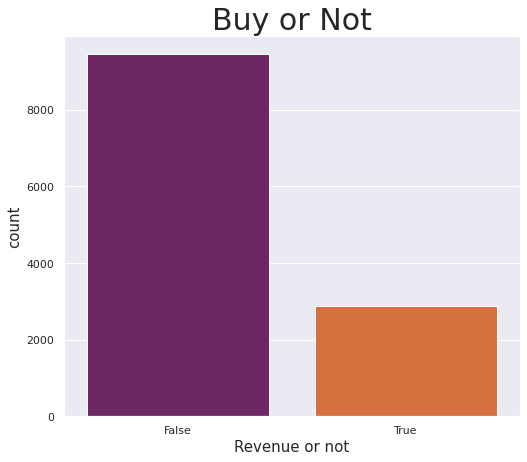

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(mydata['Weekend'], palette = 'inferno')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

## Plot of the Customer Distribution on Weekend

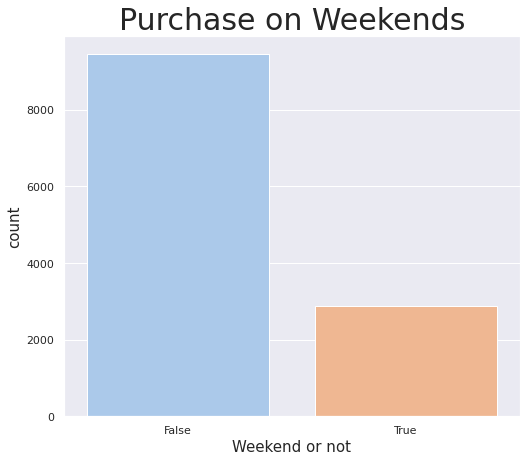

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(mydata['Weekend'], palette = 'pastel')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

## Visitor Counts

In [ ]:
mydata['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

##plotting a pie chart for Visitors

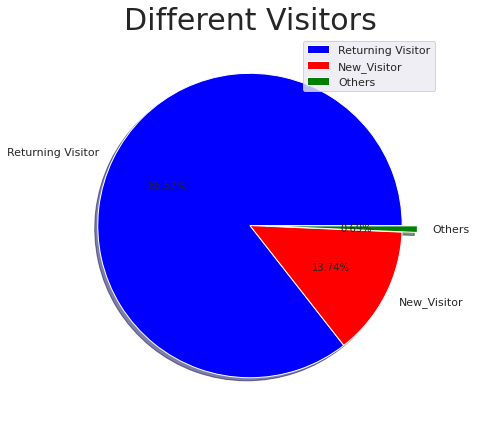

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['Blue', 'Red', 'Green']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

##Plotting a pie chart for browsers

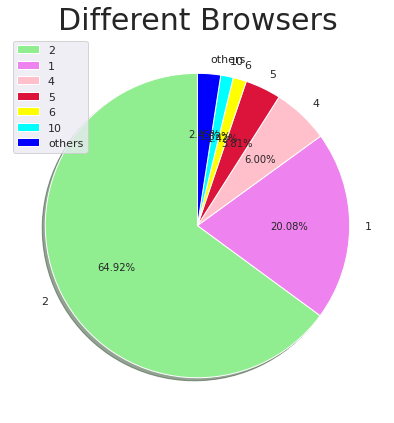

In [ ]:
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['Lightgreen', 'Violet', 'pink', 'crimson', 'yellow', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

##visualizing the distribution of customers around the Region

Text(0, 0.5, 'Count')

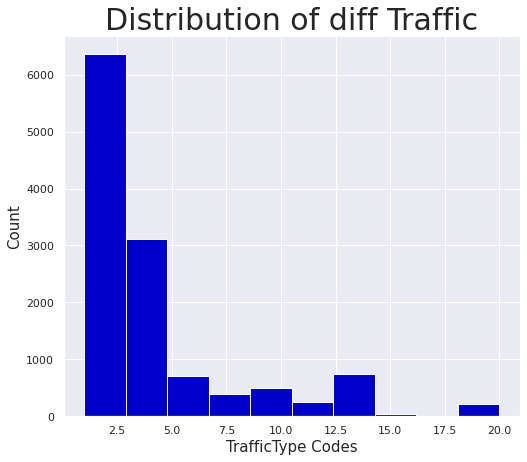

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(mydata['TrafficType'], color = 'mediumblue')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

##visualizing the distribution of CLients around the Zone

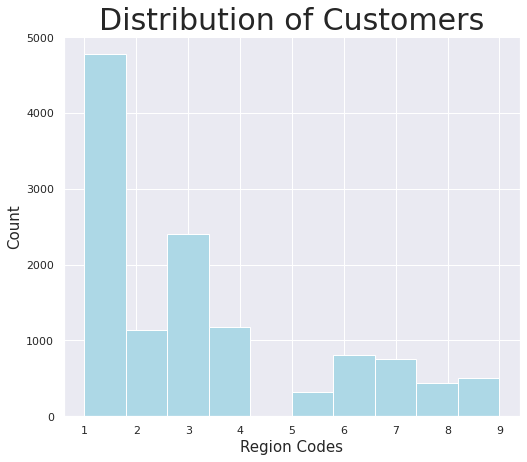

In [ ]:
plt.subplot(1, 2, 2)
plt.hist(mydata['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

##Checking the no. of Operating Systems by user

In [ ]:
mydata['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

## Donut chart for the months variations'

## plotting a pie chart for different number of users by Operating Sistems.


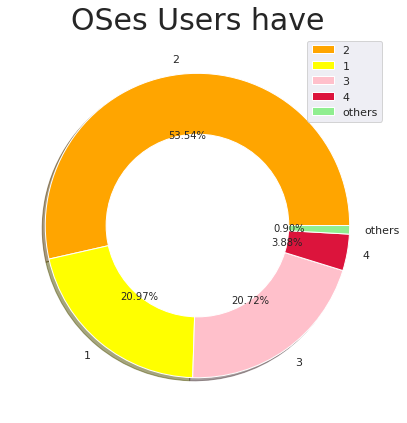

In [ ]:
size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

##checking the months with more customers visiting by online shopping sites

In [ ]:
mydata['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Holidays By month 
**May** Mothers day
**November** Thanksgiving and Veterans Day, 
**March** St. Patrick's Day, and International Women's Day. Plus, Passover, Easter, and Ramadan
**December** National Christmas Lights Day, National Christmas Movie Marathon Day, and Christmas Card Day — December holidays and observances include the last days of Hanukkah, the beginning of Kwanzaa, as well as Boxing Day, New Year's Eve, and dozens of ...

On March and May, we have a lot of visits (May is the month with the highest number of visits), yet transactions made during those 2 months are not on the same level.

We have no visits at all during Jan nor Apr.

Most transactions happen during the end of the year, with Nov as the month with the highest number of confirmed transactions.

The closer the visit date to a special day (like black Friday, new year's, ... etc) the more likely it will end up in a transaction.

Most of transactions happen on special days (SpecialDay =0).

It does not look like weekends affect the number of visits or transactions much, we can see only a slight increase in the number of transactions happening on weekends compared to those on weekdays.

**Good months for Business specially to Online business.**



##plotting a pie chart for share of special days

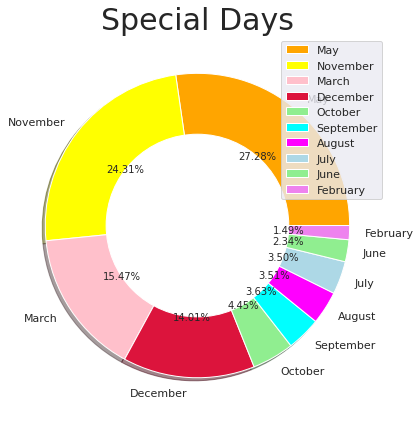

In [ ]:
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

##**Bi-Variate Analysis**

##Informational duration vs revenue

Text(0, 0.5, 'Revenue')

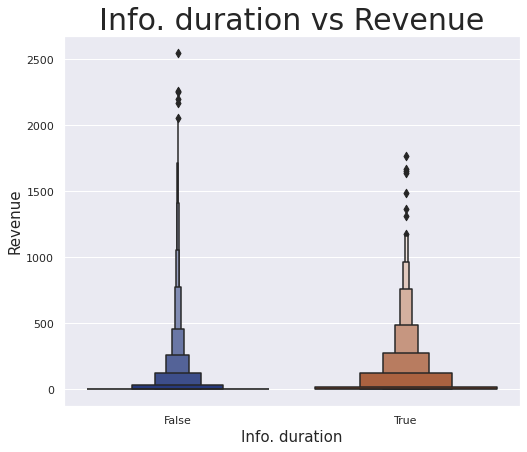

In [ ]:
plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(mydata['Revenue'], mydata['Informational_Duration'], palette = 'dark')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


##Administrative duration vs revenue

Text(0, 0.5, 'Revenue')

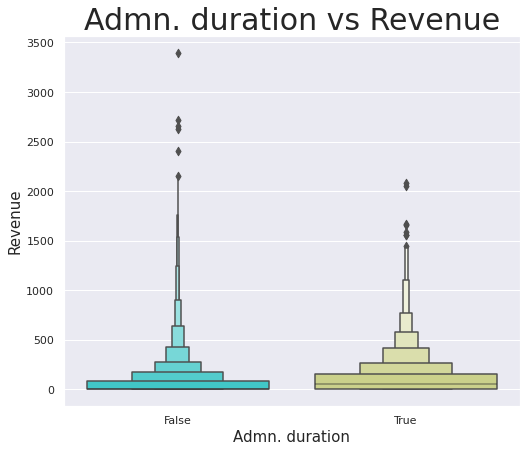

In [ ]:
plt.subplot(2, 2, 2)
sns.boxenplot(mydata['Revenue'], mydata['Administrative_Duration'], palette = 'rainbow')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


##product related duration vs revenue

Text(0, 0.5, 'Revenue')

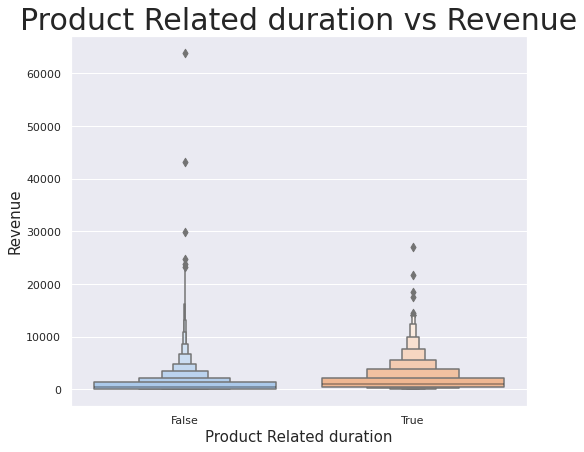

In [ ]:
plt.subplot(2, 2, 3)
sns.boxenplot(mydata['Revenue'], mydata['ProductRelated_Duration'], palette = 'pastel')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


##exit rate vs revenue

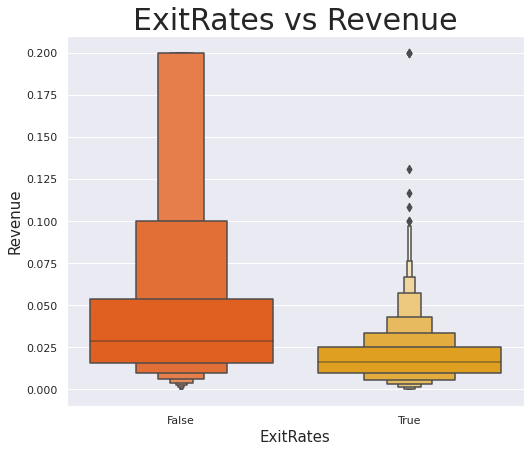

In [ ]:
plt.subplot(2, 2, 4)
sns.boxenplot(mydata['Revenue'], mydata['ExitRates'], palette = 'autumn')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show()

In [ ]:
##Page values vs revenue

Text(0, 0.5, 'Revenue')

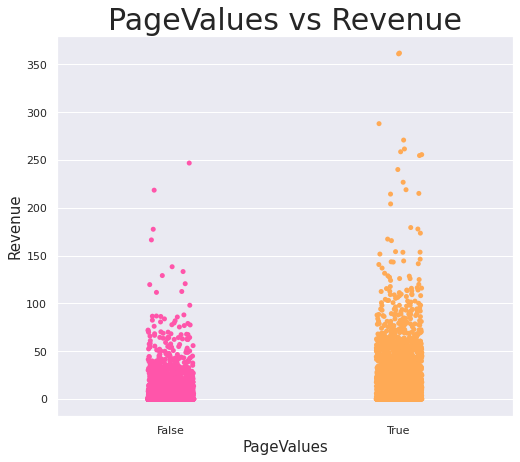

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(mydata['Revenue'], mydata['PageValues'], palette = 'spring')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

##Bounce rates vs revenue

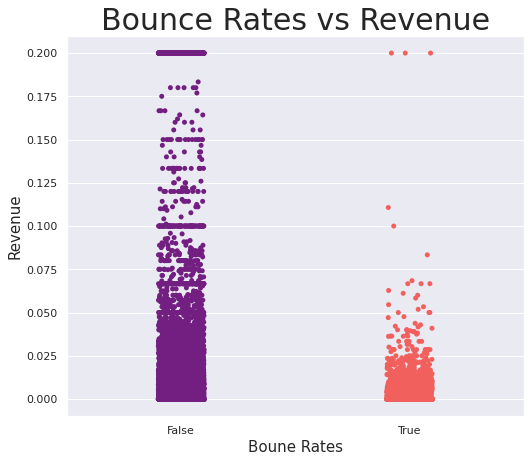

In [ ]:
plt.subplot(1, 2, 2)
sns.stripplot(mydata['Revenue'], mydata['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

##Weekend vs Revenue

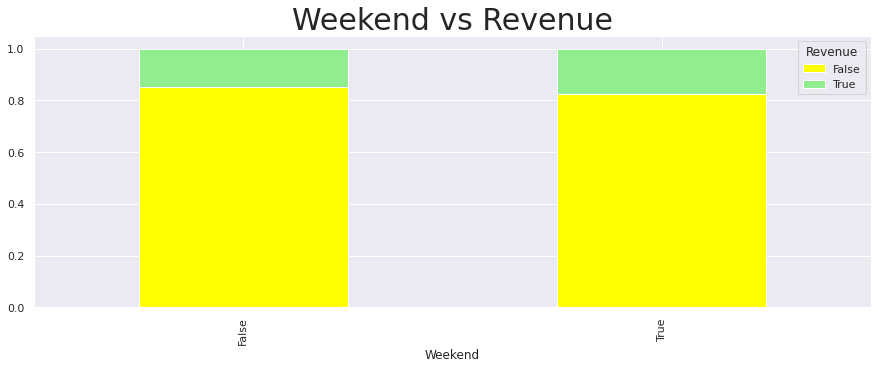

In [ ]:
df = pd.crosstab(mydata['Weekend'], mydata['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['yellow', 'lightgreen'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

##Traffic Type vs Revenue

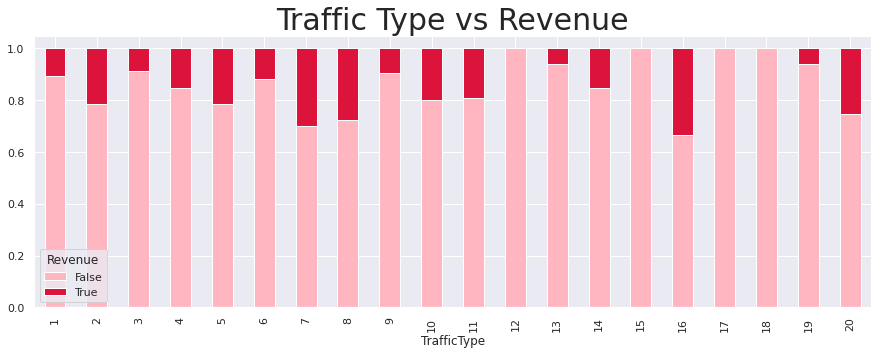

In [ ]:
df = pd.crosstab(mydata['TrafficType'], mydata['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'crimson'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

##Visitor type vs revenue

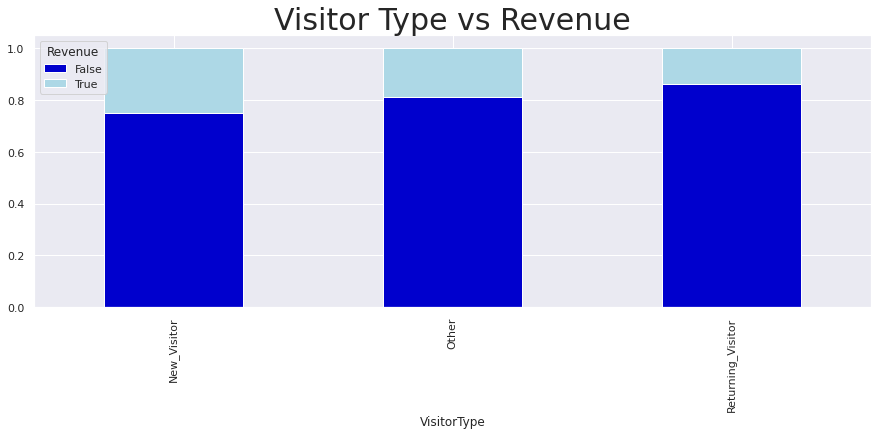

In [ ]:
df = pd.crosstab(mydata['VisitorType'], mydata['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['mediumblue', 'lightblue'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

##Region vs Revenue


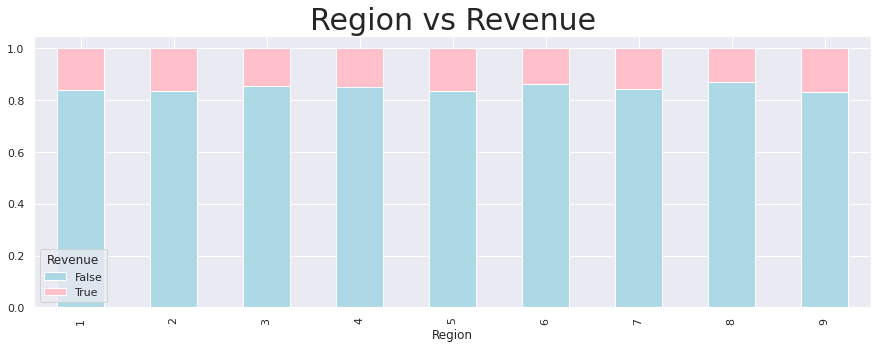

In [ ]:
df = pd.crosstab(mydata['Region'], mydata['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'pink'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()


##lm plot

Text(0.5, 1.0, 'LM Plot between Admistrative and Information')

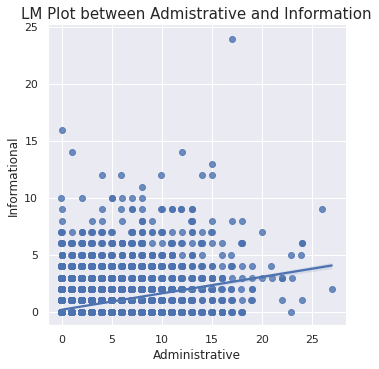

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)

sns.lmplot(x = 'Administrative', y = 'Informational', data = mydata, x_jitter = 0.05)
plt.title('LM Plot between Admistrative and Information', fontsize = 15)

#**Multi-Variate Analysis**

## month vs pagevalues wrt revenue

Text(0.5, 1.0, 'Mon. vs PageValues . with reference to Rev.')

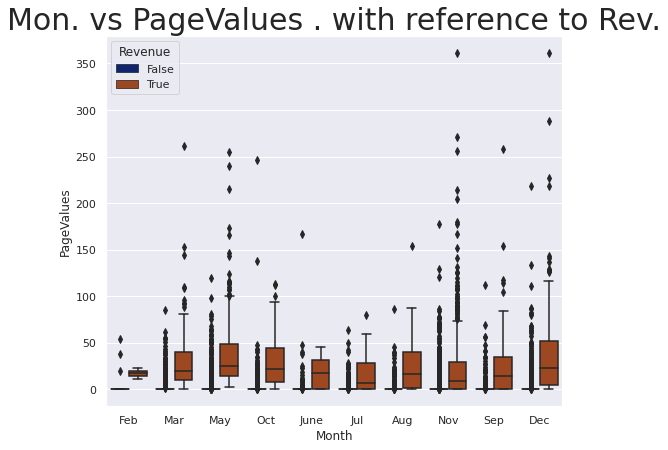

In [ ]:
plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = mydata['Month'], y = mydata['PageValues'], hue = mydata['Revenue'], palette = 'dark')
plt.title('Mon. vs PageValues . with reference to Rev.', fontsize = 30)

## Month vs exit rates wrt revenue


Text(0.5, 1.0, 'Mon. vs ExitRates with reference to Rev.')

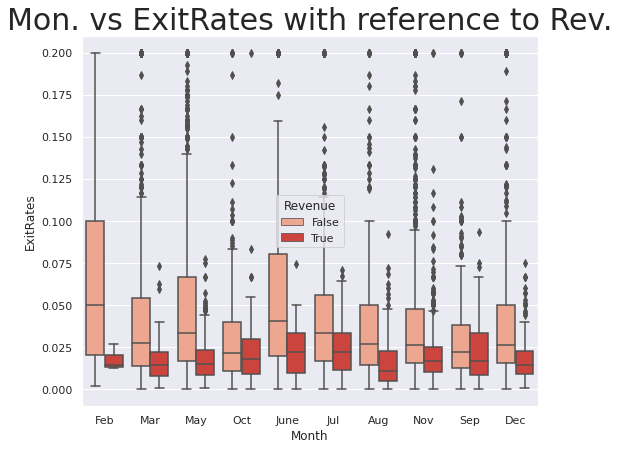

In [ ]:
plt.subplot(2, 2, 2)
sns.boxplot(x = mydata['Month'], y = mydata['ExitRates'], hue = mydata['Revenue'], palette = 'Reds')
plt.title('Mon. vs ExitRates with reference to Rev.', fontsize = 30)

## month vs bouncerates wrt revenue


Text(0.5, 1.0, 'Mon. vs BounceRates w.r.t. Rev.')

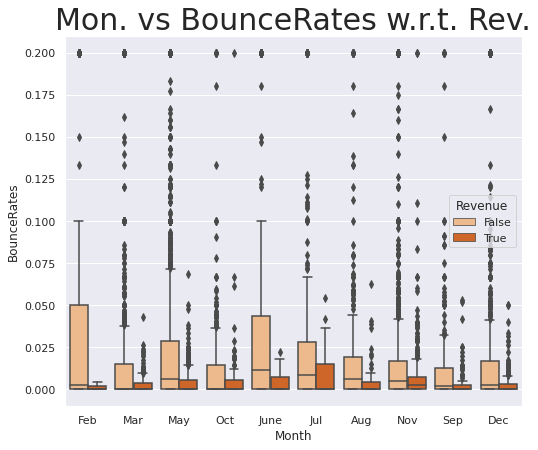

In [ ]:
plt.subplot(2, 2, 3)
sns.boxplot(x = mydata['Month'], y = mydata['BounceRates'], hue = mydata['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

## Visitor type vs exit rates with reference to revenue


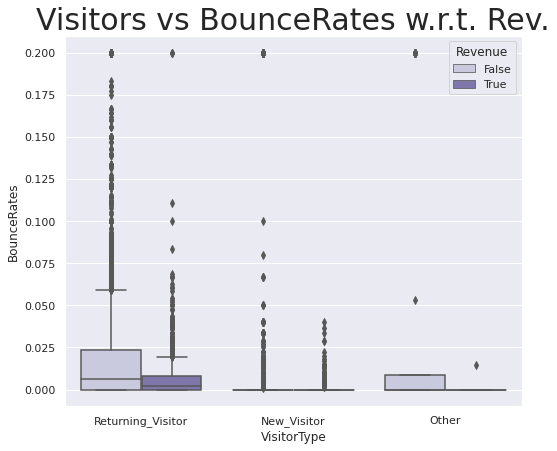

In [ ]:
plt.subplot(2, 2, 4)
sns.boxplot(x = mydata['VisitorType'], y = mydata['BounceRates'], hue = mydata['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

plt.show()

## Inputing Missing Values with 0



In [ ]:
mydata.fillna(0, inplace = True)
mydata.isnull().sum().sum()

0

###Now we see the result again.


In [ ]:
print(mydata.shape)
print(mydata.head(10))

(12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   
5               0                      0.0              0   
6               0                      0.0              0   
7               1                      0.0              0   
8               0                      0.0              0   
9               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0           

##Plot a histogram for each numerical attribute in the mydata

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f040931e650>,
      dtype=object)

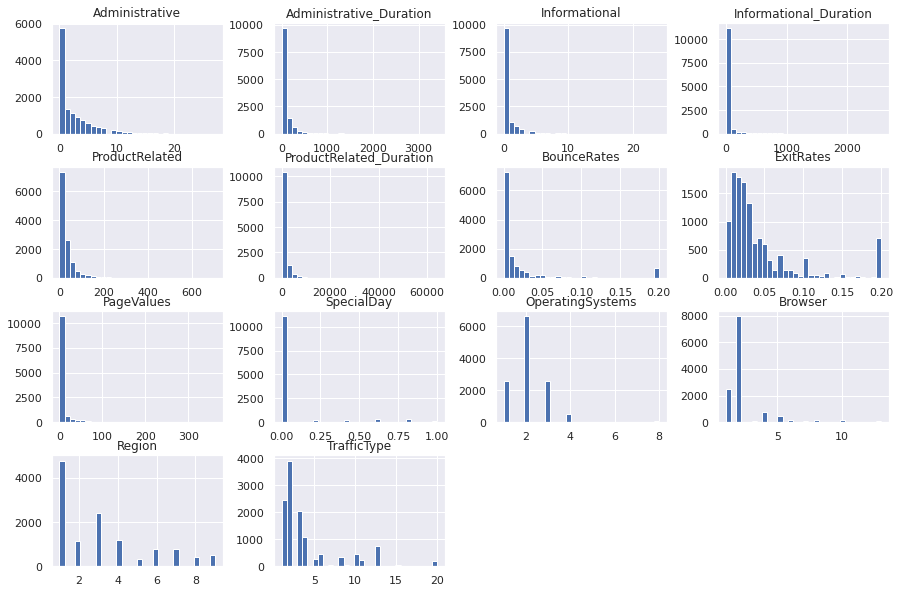

In [ ]:
mydata.hist(bins=30, figsize=(15, 10))

##Data Cleaning (if necessary)

We can have a quick look at the data type in each column of our dataset to make sure if there are any missing values.

In [ ]:
mydata.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Month and VisitorType are object type, we can quickly check if there is any missing values by counting the values.

In [ ]:
print(mydata['Month'].value_counts())
print(mydata['VisitorType'].value_counts())

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


##Data preprocessing

As we have categorical features in our dataset, we need to encode them before so we can use them in our analysis later.

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(),['Month','OperatingSystems','Browser','VisitorType','Weekend']),remainder='passthrough')

##Scaler

In [ ]:
scalar = MinMaxScaler()

##Purchased

In [ ]:
dataset_p = mydata[mydata.Revenue==True]

##Not Purchased

In [ ]:
dataset_np = mydata[mydata.Revenue==False]

##Downsampled the Dataset

In [ ]:
dataset_p_down = resample(dataset_p,replace=False,n_samples=1000)
dataset_np_down = resample(dataset_np,replace=False,n_samples=5000)
dataset = pd.concat([dataset_p_down,dataset_np_down])

##Identifying the class label

In [ ]:
X = dataset.drop(columns=['Revenue'])
y = dataset['Revenue']

##Encoding categorical features

In [ ]:
column_trans.fit(X)
X = column_trans.transform(X)

##Spiliting Dataset into training(75%) and test set(25%)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Specifying model training on 75% of the data, by using a test-size of 25%

In [ ]:
scalar.fit(X)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)


In [ ]:
# Classification by Random Forest classifier
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter
clf = RandomForestClassifier(n_estimators=estimators, min_samples_split=mss) # default parameters are fine
# Fit the model using the training set
clf.fit(X_train, y_train)
# Predict for the test set
y_preds = clf.predict(X_test)

Metrics analyses
Confusion Matrix using the default probability threshold of 0.5

In [ ]:
from posixpath import sep
CM = confusion_matrix(y_test, y_preds)
# TP, TN, FP, FN
tn, fp, fn, tp = CM.ravel()
# Accuracy rate
AR = accuracy_score(y_test, y_preds)
# Error rate
ER = 1.0 - AR
# Precision
#P = precision_score(y_test, y_preds)
# Recall
#R = recall_score(y_test, y_preds)
# F1 score
#F1 = f1_score(y_test, y_preds)
# ROC analysis
# TP rates, FP rates and Probability thresholds
#fpr, tpr, th = roc_curve(y_test, y_preds)
# AUC score (using auc function)
#AUC = auc(fpr, tpr)



#Data Visualisation

##Features correlation matrix

###Correlation between our variables we can plot the correlation matrix.

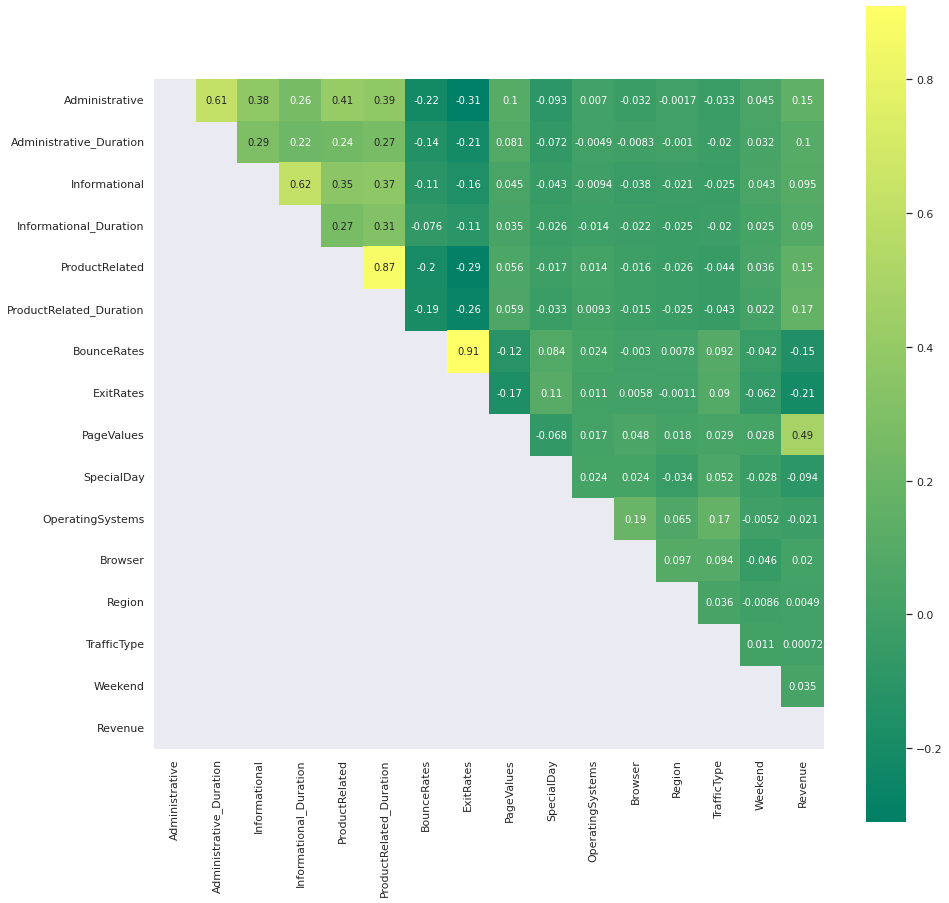

In [ ]:
plt.subplots(figsize=(15,15))
matrix = np.tril(mydata.corr())
sns.heatmap(dataset.corr(), annot = True, cmap= 'summer',square=True,mask = matrix)

##The last column that the target is only correlated to a small number of variables in this dataset.

In general, there is very little correlation among the different features in our dataset.

The very few cases of high correlation (|corr| >= 0.7) are:

BounceRates & ExitRates (0.9).

ProductRelated & ProductRelated_Duration (0.9).

Moderate Correlations (0.3 < |corr| < 0.7):

Among the following features: Administrative, 

Administrative_Duration, Informational, 

Informational_Duration, ProductRelated, and 

ProductRelated_Duration.

Also between PageValues and Revenue.

#**Principal Component Analysis**
We can use principal component analysis to see if we can have a good representation of our dataset in two or three dimensions.

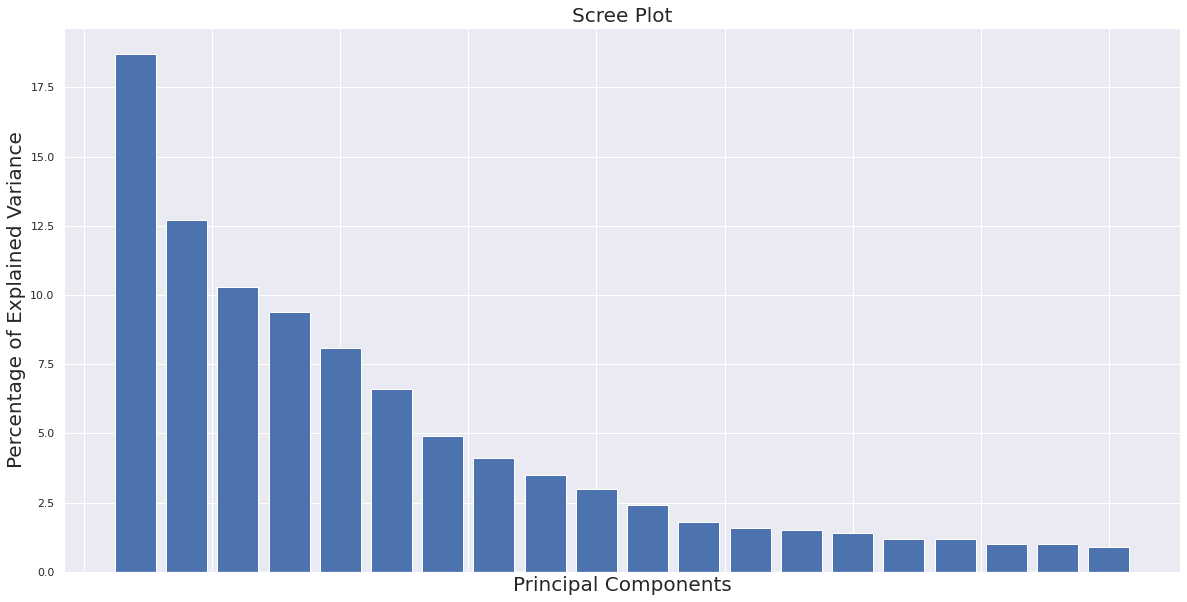

In [ ]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]
plt.rcParams['figure.figsize'] = (20, 10)
font=20
plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Percentage of Explained Variance', fontsize = font)
plt.xlabel('Principal Components', fontsize = font)
plt.title('Scree Plot', fontsize = font)
plt.show()


##Because the percentage of explained variance decay slowly, it is not possible to represent well our dataset in two or three dimensions.
##**2D PCA Plot**
We can have a look at our dataset in a 2D Plot.

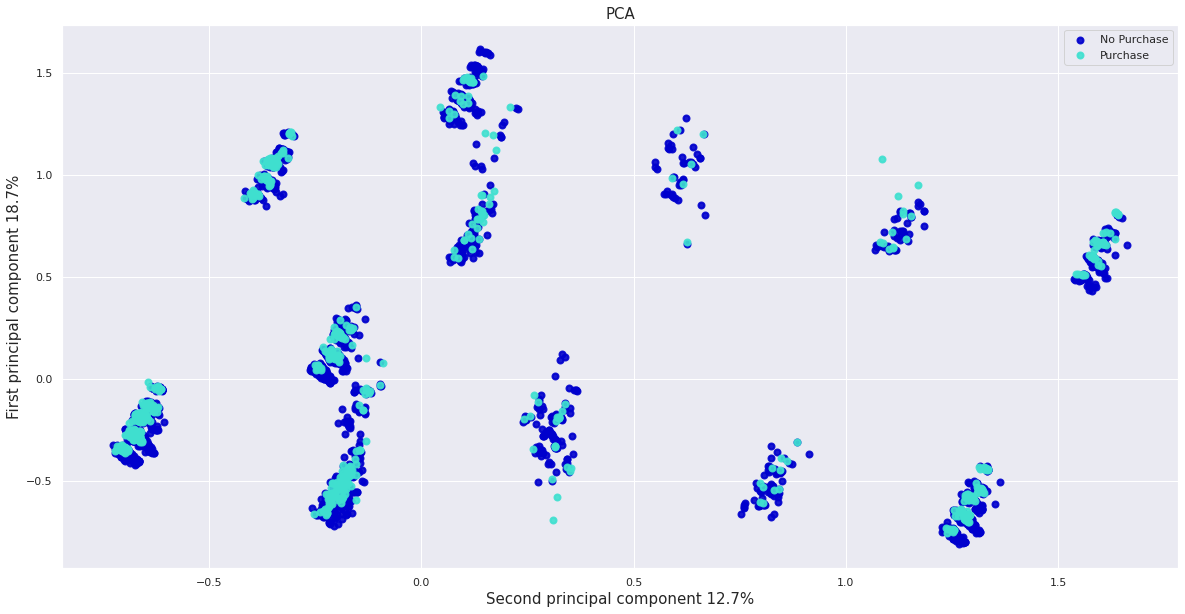

In [ ]:
X_r = pca.fit(X_train).transform(X_train)
plt.figure()
colors = ['mediumblue', 'turquoise']
lw = 2
target_names= ["No Purchase","Purchase"]

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y_train == i, 0], X_r[y_train == i, 1], color=color, alpha=.9, lw=lw,
                label=target_name)

font=15
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA',fontsize=font)
pca100 = pca.explained_variance_ratio_
D1 = "First principal component " + str(round(pca100[0] * 100,1)) + "%"
D2 = "Second principal component " + str(round(pca100[1] * 100,1)) + "%"
plt.ylabel(D1,fontsize=font)
plt.xlabel(D2,fontsize=font)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

##There are 12 clusters that may correspond to the 12 months.
##**Univariate Analysis**
We can look at the dataset balance with a few bar plots.

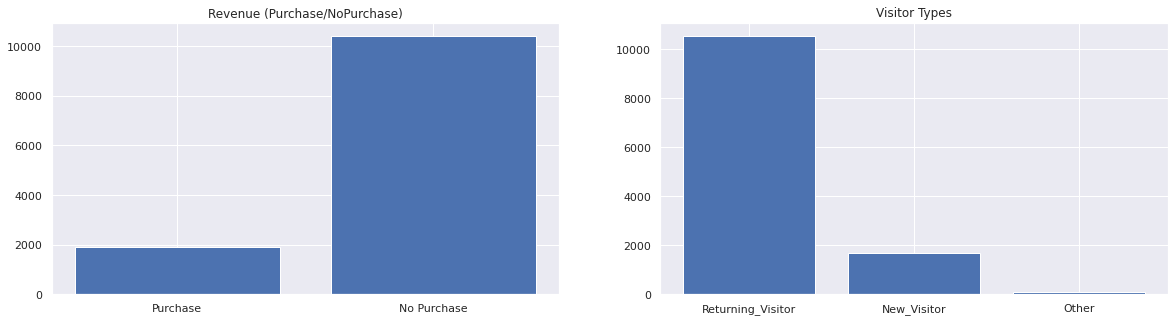

In [ ]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(20,5)

#Visitor Types
axs[1].set_title("Visitor Types")
Vtype = ['Returning_Visitor','New_Visitor','Other']
count_vtype = [mydata['VisitorType'].value_counts()['Returning_Visitor'],
               mydata['VisitorType'].value_counts()['New_Visitor'],
               mydata['VisitorType'].value_counts()['Other']]
axs[1].bar(Vtype,count_vtype)

#Number of Purchased
axs[0].set_title("Revenue (Purchase/NoPurchase)")
TF = ["Purchase","No Purchase"]
TF_count = [mydata['Revenue'].value_counts()[True],mydata['Revenue'].value_counts()[False]]
axs[0].bar(TF,TF_count)

plt.show()


##We have approximately 5 times more negative entries and most of our dataset is composed of Returning_Visitors

Text(0.5, 1.0, 'Number of Purchase each month')

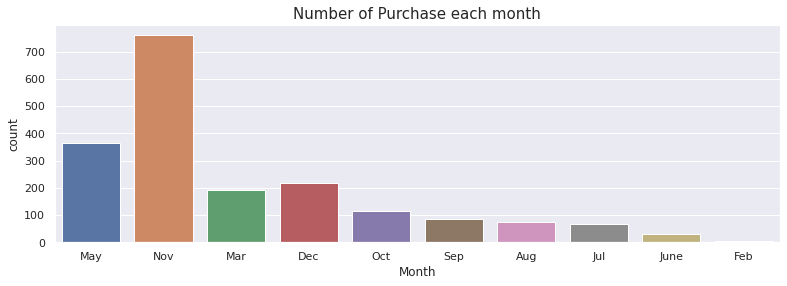

In [ ]:
plt.figure(figsize=(13, 4))
sns.countplot(dataset_p.Month.dropna(), order = mydata.Month.value_counts().index);
plt.title('Number of Purchase each month', fontsize = 15)

##The number of 'purchase' is very important in November, maybe it is because of Black Friday ? ;)

Text(0.5, 1.0, 'Number of No Purchase each month')

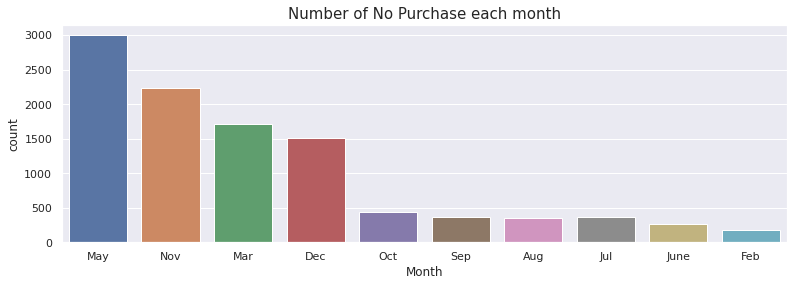

In [ ]:
plt.figure(figsize=(13, 4))
sns.countplot(dataset_np.Month.dropna(), order = mydata.Month.value_counts().index);
plt.title('Number of No Purchase each month', fontsize = 15)

The number of “no purchase” sessions is more important in May, November, March and December, showing that there are more visits to the site these months.

##**Bivariate analysis**

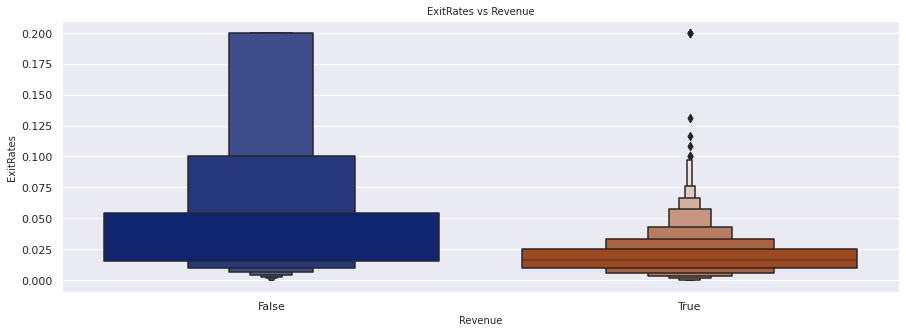

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
# exit rate vs raevenue
sns.boxenplot(mydata['Revenue'], mydata['ExitRates'], palette = 'dark')
plt.title('ExitRates vs Revenue', fontsize = 10)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('ExitRates', fontsize = 10)

plt.show()

Differences in ExitRates are not that significant by Revenue. We can note that the ExitRates are a little lower when there is a 'Purchase'.

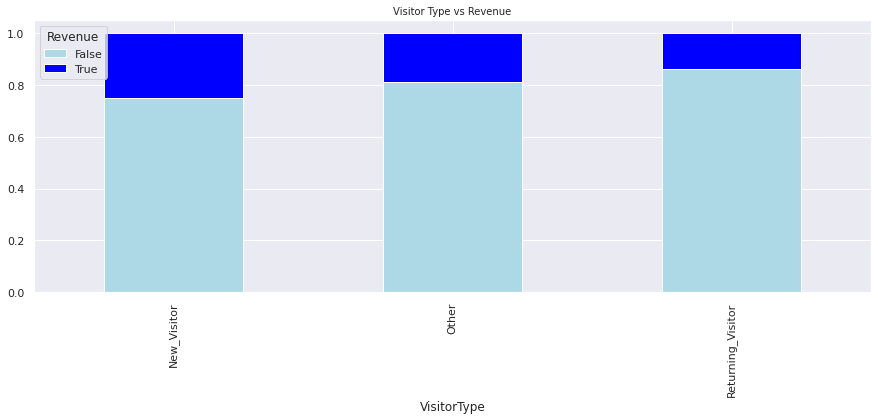

In [ ]:
df = pd.crosstab(mydata['VisitorType'], mydata['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Visitor Type vs Revenue', fontsize = 10)
plt.show()

This crosstab shows us that the Visitor_Type has almost no influence on the number of Purchases.
##**Multivariate analysis**

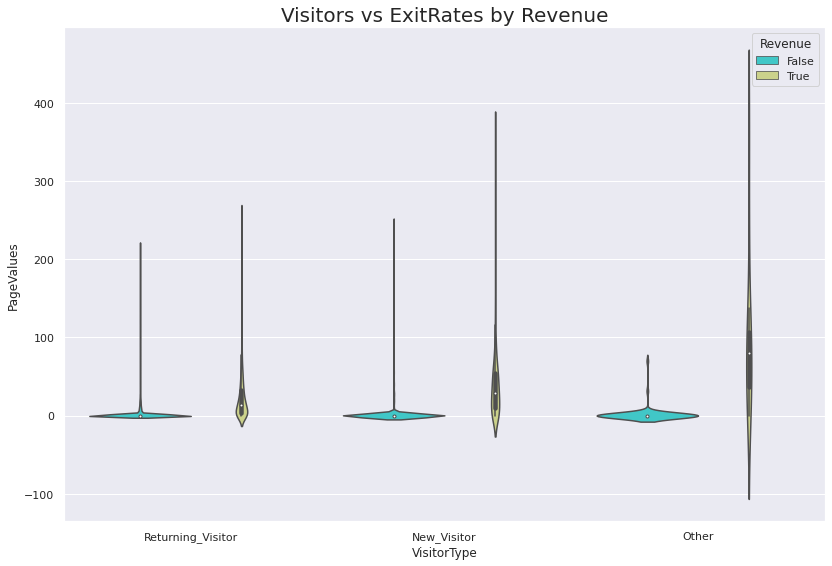

In [ ]:
plt.rcParams['figure.figsize'] = (30, 20)
plt.subplot(2, 2, 1)
sns.violinplot(x = mydata['VisitorType'], y = mydata['PageValues'], hue = mydata['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates by Revenue', fontsize = 20)
plt.show()

The violin plot is showing us the same pattern for each visitor type. Page Value for most of the entries are close to 0 when the Revenue is False. But the values are spread out when Revenue is True. This may come from the definition of the PageValue, which gives a value close to 0 to pages which did not generate a lot of revenue.

##**Building ML Model**

Overview of a few model's performance

Let's compare a few algorithms that can be used for classification to see the performance of each ones.

Naive Bayes 
 Accuracy: 0.2753333333333333 
 F-score 0.3098412698412698


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression 
 Accuracy: 0.864 
 F-score 0.3503184713375796
K Nearest Neighbour 
 Accuracy: 0.834 
 F-score 0.1941747572815534
Support Vector Classification 
 Accuracy: 0.8433333333333334 
 F-score 0.10646387832699619
Decision Tree Classification 
 Accuracy: 0.8706666666666667 
 F-score 0.6150793650793652
Stochastic Gradient Descent 
 Accuracy: 0.8793333333333333 
 F-score 0.49014084507042255
Linear Discriminant Analysis 
 Accuracy: 0.87 
 F-score 0.43478260869565216
Gradient Boosting Classification  
 Accuracy: 0.9006666666666666 
 F-score 0.6590389016018308
Random Forest Classification 
 Accuracy: 0.9073333333333333 
 F-score 0.6666666666666667


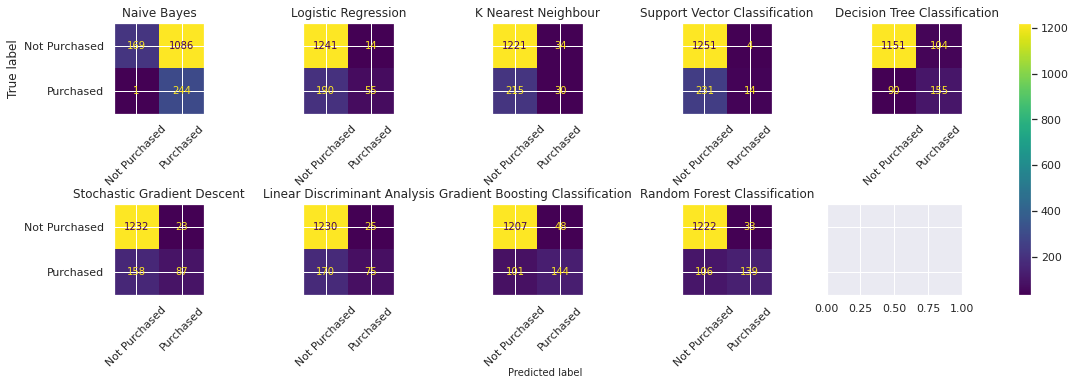

In [ ]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbour": KNeighborsClassifier(),
    "Support Vector Classification": SVC(),
    "Decision Tree Classification": DecisionTreeClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gradient Boosting Classification ": GradientBoostingClassifier(),
    "Random Forest Classification": RandomForestClassifier()
    }

f, axes = plt.subplots(2, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    j = 0
    k = i
    if i>4:
        k = i-5
        j+=1
    
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(key, "\n Accuracy:",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred))
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Not Purchased","Purchased"])
    disp.plot(ax=axes[j][k], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.43, -0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=1)


f.colorbar(disp.im_, ax=axes)
plt.show()

##The four best performing ones are Random Forest, Gradient Boosting, Stochastic Gradient Descent and Decision Tree.



In [ ]:
mydata.shape

(12330, 18)

##Data Proprocessing
The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list. Currently we have data in the form of a pandas dataframe. To convert our pandas dataframe into a list of lists, execute the following script:



In [ ]:
transactions=[]
for i in range(0,12330):
    transactions.append([str(mydata.values[i,j]) for j in range(0,18)])

In [ ]:
transactions[:2]

[['0',
  '0.0',
  '0',
  '0.0',
  '1',
  '0.0',
  '0.2',
  '0.2',
  '0.0',
  '0.0',
  'Feb',
  '1',
  '1',
  '1',
  '1',
  'Returning_Visitor',
  'False',
  'False'],
 ['0',
  '0.0',
  '0',
  '0.0',
  '2',
  '64.0',
  '0.0',
  '0.1',
  '0.0',
  '0.0',
  'Feb',
  '2',
  '2',
  '1',
  '2',
  'Returning_Visitor',
  'False',
  'False']]

**Applying Apriori**

**Training the apriori model**

The next step is to apply the Apriori algorithm on the dataset. To do so, we can use the apriori class that we imported from the apyori library.

In [ ]:
from apyori import apriori
rules=apriori(transactions,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2,max_length=2)

List of observed rules can be seen below:

In [ ]:
results=list(rules)
results

[RelationRecord(items=frozenset({'0.018181818', '11'}), support=0.00421735604217356, ordered_statistics=[OrderedStatistic(items_base=frozenset({'0.018181818'}), items_add=frozenset({'11'}), confidence=0.31901840490797545, lift=6.005338828267691)]),
 RelationRecord(items=frozenset({'0.02', '10'}), support=0.00575831305758313, ordered_statistics=[OrderedStatistic(items_base=frozenset({'0.02'}), items_add=frozenset({'10'}), confidence=0.2784313725490196, lift=3.190575114804286)]),
 RelationRecord(items=frozenset({'0.022222222', '9'}), support=0.00592051905920519, ordered_statistics=[OrderedStatistic(items_base=frozenset({'0.022222222'}), items_add=frozenset({'9'}), confidence=0.30932203389830504, lift=3.5314265536723157)]),
 RelationRecord(items=frozenset({'0.028571429', '7'}), support=0.009407948094079481, ordered_statistics=[OrderedStatistic(items_base=frozenset({'0.028571429'}), items_add=frozenset({'7'}), confidence=0.4478764478764479, lift=3.533152016837238)]),
 RelationRecord(items=

#**Visualization of Results**

In [ ]:
lhs,rhs,support,confidence,lift=[],[],[],[],[]
for result in results:
    lhs.append(tuple(result[2][0][0])[0])
    rhs.append(tuple(result[2][0][1])[0])
    support.append(result[1])
    confidence.append(result[2][0][2])
    lift.append(result[2][0][3])

In [ ]:
columns=list(zip(lhs,rhs,support,confidence,lift))

Converting into dataframe

In [ ]:
result_df=pd.DataFrame(columns)
result_df.columns=['Item1','Item2','Support','Confidence','Lift']
result_df

,Item1,Item2,Support,Confidence,Lift
0,0.018181818,11,0.004217,0.319018,6.005339
1,0.02,10,0.005758,0.278431,3.190575
2,0.022222222,9,0.005921,0.309322,3.531427
3,0.028571429,7,0.009408,0.447876,3.533152
4,0.036363636,11,0.003082,0.633333,11.922137
5,0.04,5,0.012165,0.490196,3.071198
6,0.057142857,7,0.003974,0.644737,5.086120
7,0.133333333,0.066666667,0.003974,0.604938,19.027778
8,0.08,5,0.003650,0.642857,4.027657
9,0.15,0.1,0.003244,0.571429,16.461949


Sorting the relations by their lift

In [ ]:
result_df=result_df.sort_values('Lift',ascending=False)
result_df

,Item1,Item2,Support,Confidence,Lift
7,0.133333333,0.066666667,0.003974,0.604938,19.027778
16,Other,20,0.004217,0.611765,17.874547
9,0.15,0.1,0.003244,0.571429,16.461949
4,0.036363636,11,0.003082,0.633333,11.922137
18,Other,9,0.004542,0.658824,7.521569
15,Other,13,0.004298,0.623529,6.870525
0,0.018181818,11,0.004217,0.319018,6.005339
17,Other,8,0.004623,0.670588,5.213337
19,Other,Dec,0.005028,0.729412,5.207671
6,0.057142857,7,0.003974,0.644737,5.086120


In [ ]:
print(len(results))

20


In [ ]:
print(results[0])

RelationRecord(items=frozenset({'0.018181818', '11'}), support=0.00421735604217356, ordered_statistics=[OrderedStatistic(items_base=frozenset({'0.018181818'}), items_add=frozenset({'11'}), confidence=0.31901840490797545, lift=6.005338828267691)])


In [ ]:
for item in results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: 0.018181818 -> 11
Support: 0.00421735604217356
Confidence: 0.31901840490797545
Lift: 6.005338828267691
Rule: 0.02 -> 10
Support: 0.00575831305758313
Confidence: 0.2784313725490196
Lift: 3.190575114804286
Rule: 0.022222222 -> 9
Support: 0.00592051905920519
Confidence: 0.30932203389830504
Lift: 3.5314265536723157
Rule: 0.028571429 -> 7
Support: 0.009407948094079481
Confidence: 0.4478764478764479
Lift: 3.533152016837238
Rule: 0.036363636 -> 11
Support: 0.0030819140308191405
Confidence: 0.6333333333333333
Lift: 11.922137404580152
Rule: 5 -> 0.04
Support: 0.012165450121654502
Confidence: 0.4901960784313726
Lift: 3.071197991391679
Rule: 0.057142857 -> 7
Support: 0.00397404703974047
Confidence: 0.644736842105263
Lift: 5.086119810081826
Rule: 0.133333333 -> 0.066666667
Support: 0.00397404703974047
Confidence: 0.6049382716049382
Lift: 19.027777777777775
Rule: 0.08 -> 5
Support: 0.0036496350364963502
Confidence: 0.6428571428571429
Lift: 4.027656794425088
Rule: 0.1 -> 0.15
Support: 0.003244

##**Conclusion**
Association rule mining algorithms such as Apriori are very useful for finding simple associations between our data items. They are easy to implement and have high explain-ability. 

Reference List

Arora, S. K. (2022). What is Apriori Algorithm in Data Mining? Hackr.Io. https://hackr.io/blog/what-is-apriori-algorithm

K. (2020, July 30). Apriori-Eclat/Apriori.ipynb at master · Karan-Malik/Apriori-Eclat. GitHub. https://github.com/Karan-Malik/Apriori-Eclat/blob/master/Apriori.ipynb

K. (2021a, July 19). GitHub - kevinlim-fr/ESILV-PFDS-Online-Shoppers-Purchasing-Intention: This is a Python Machine learning classification project. The goal is to predict a purchase intention by analyzing an online shopping session. GitHub. https://github.com/kevinlim-fr/ESILV-PFDS-Online-Shoppers-Purchasing-Intention

M. (2021b, March 3). Final Project - Online Shoppers Intention. Kaggle. https://www.kaggle.com/code/mamun18/final-project-online-shoppers-intention
